## Exploratory Data Analysis of Maternal and Infant Characteristics

#### Author : Wika Dhammayanti

#### Introduction
This report presents the findings of an Exploratory Data Analysis (EDA) conducted on the "mheight" (Maternal Height), "Length" (Infant Length), "mage" (Maternal Age) and "Birthweight" (Infant birtweight) variables in the "Birthweight" dataset. The primary objective of this analysis is to gain insights into the distribution and relationship between these variables, as well as the hypotheses.

#### Hypotheses:
1. Hypothesis for Maternal height and Baby length
    - H0: There is no significant linear relationship between Maternal height and Baby length.
    - H1: There is a significant linear relationship between Maternal height and Baby length.
2. Hypothesis for Maternal height and Baby birthweight
    - H0: There is no significant linear relationship between Maternal height and Baby birtweight.
    - H1: There is a significant linear relationship between Maternal height and Baby birthweight.
3. Hypothesis for Maternal age and Baby birthweight
    - H0: There is no significant linear relationship between Maternal age and Baby birthweight.
    - H1: There is a significant linear relationship between Maternal age and Baby birthweight.

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [12]:
df = pd.read_csv  (r'F:\DA\Datasets-20230409T101856Z-001\Datasets\Birthweight_reduced_kg_R.csv')
df.head()

,ID,Length,Birthweight,Headcirc,Gestation,smoker,mage,mnocig,mheight,mppwt,fage,fedyrs,fnocig,fheight,lowbwt,mage35
0,1360,56,4.55,34,44,0,20,0,162,57,23,10,35,179,0,0
1,1016,53,4.32,36,40,0,19,0,171,62,19,12,0,183,0,0
2,462,58,4.10,39,41,0,35,0,172,58,31,16,25,185,0,1
3,1187,53,4.07,38,44,0,20,0,174,68,26,14,25,189,0,0
4,553,54,3.94,37,42,0,24,0,175,66,30,12,0,184,0,0


In [20]:
# Number of rows
print(df.shape)

# Column names
print(df.columns.tolist())

# Data types
print(df.dtypes)

(42, 16)
['ID', 'Length', 'Birthweight', 'Headcirc', 'Gestation', 'smoker', 'mage', 'mnocig', 'mheight', 'mppwt', 'fage', 'fedyrs', 'fnocig', 'fheight', 'lowbwt', 'mage35']
ID               int64
Length           int64
Birthweight    float64
Headcirc         int64
Gestation        int64
smoker           int64
mage             int64
mnocig           int64
mheight          int64
mppwt            int64
fage             int64
fedyrs           int64
fnocig           int64
fheight          int64
lowbwt           int64
mage35           int64
dtype: object


#### Data Description
The Birthweight dataset contains information related to birth characteristics and parental attribute.
The dataset contains 42 rows and 16 attributes or columns. 
Data Types:
- ID: Unique identifier to each observation
- Length: Infant length in centimeters (numeric)
- Birthweight: Birthweight of the infant in grams (numeric)
- Headcirc: Infant’s head circumference in centimeters (numeric)
- Gestation: Gestational age in weeks (numeric)
- Smoker: indicator variable for maternal smoking during pregnancy (numeric: 0 = Non-smoker, 1 = smoker)
- Mage: Maternal age in years (numeric)
- Mnocig: Number of cigarettes smoke by the mother per day (numeric) 
- Mheight: Maternal height is centimeters (numeric)
- Mpwwt: Maternal pre- pregnancy weight in kilograms (numeric)
- Fage: Paternal age in yeas (numeric)
- Fnocig: Number of cigarettes smoked by the father per day (numeric)
- Fheight: Paternal height in centimeters (numeric)
- Lowbwt: Indicator variable for low birthweight (numeric: 0 = normal, 1 = low birth- weight)
- Mage35: Indicator variable for maternal age above 35 years (numeric: 0 = younger than 35, 1 = 35 or older)

In [5]:
# Check for duplicate rows
duplicate_rows = df.duplicated()
num_duplicates = duplicate_rows.sum()
print("Number of duplicate rows:", num_duplicates)

# Check for missing values
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

Number of duplicate rows: 0
Missing values:
 ID             0
Length         0
Birthweight    0
Headcirc       0
Gestation      0
smoker         0
mage           0
mnocig         0
mheight        0
mppwt          0
fage           0
fedyrs         0
fnocig         0
fheight        0
lowbwt         0
mage35         0
dtype: int64


#### Data Cleanning and Feature Engineering
During the data analysis proces, the following actions were taken for data cleaning and featuring enginering:
- Duplicate Rows: The dataset was examined for any duplicate rows. It was found that there were no duplicate rows present in the dataset.
- Missing Values: The dataset was checked for missing values in each attribute. Fortunately, no missing values were found in any of the columns. Hence, no imputation or removal of missing values was required. 
- Feature Engineering: As the dataset already contained numerical types and did not have any missing values or duplicate rows, no additional feature engineering was performed. The datasetwas considered to be in a suitable form for data analysis without the need for further preprocessing steps. 

#### Exploratory Data Analysis (EDA)
In this section, we explore and analyze the main characteristics of the dataset.

In [21]:
stats_df = df.describe()
stats_df.loc['range'] = stats_df.loc['max'] - stats_df.loc['min']
out_fields = ['mean', 'std', '25%', '50%', '75%', 'range']
stats_df = stats_df.loc[out_fields]
stats_df.rename({'50%': 'median'}, inplace=True)
stats_df

,ID,Length,Birthweight,Headcirc,Gestation,smoker,mage,mnocig,mheight,mppwt,fage,fedyrs,fnocig,fheight,lowbwt,mage35
mean,894.071429,51.333333,3.312857,34.595238,39.190476,0.523810,25.547619,9.428571,164.452381,57.500000,28.904762,13.666667,17.190476,180.500000,0.142857,0.095238
std,467.616186,2.935624,0.603895,2.399792,2.643336,0.505487,5.666342,12.511737,6.504041,7.198408,6.863866,2.160247,17.308165,6.978189,0.354169,0.297102
25%,537.250000,50.000000,2.940000,33.000000,38.000000,0.000000,20.250000,0.000000,161.000000,52.250000,23.000000,12.000000,0.000000,175.250000,0.000000,0.000000
median,821.000000,52.000000,3.295000,34.000000,39.500000,1.000000,24.000000,4.500000,164.500000,57.000000,29.500000,14.000000,18.500000,180.500000,0.000000,0.000000
75%,1269.500000,53.000000,3.647500,36.000000,41.000000,1.000000,29.000000,15.750000,169.500000,62.000000,32.000000,16.000000,25.000000,184.750000,0.000000,0.000000
range,1737.000000,15.000000,2.650000,9.000000,12.000000,1.000000,23.000000,50.000000,32.000000,33.000000,27.000000,6.000000,50.000000,31.000000,1.000000,1.000000


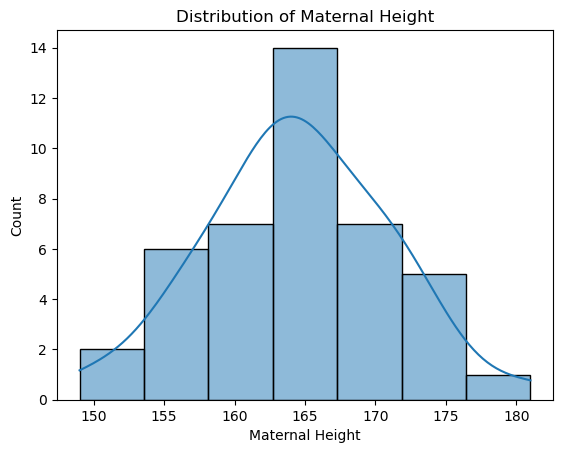

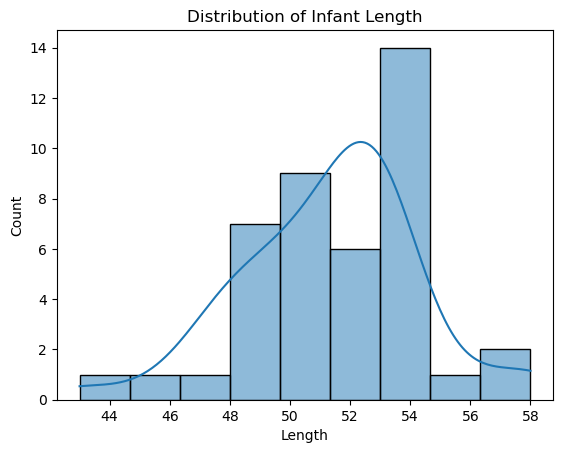

Variable: mheight
Shapiro-Wilk Test - Statistic: 0.9921, p-value: 0.9912
The variable is likely normally distributed.

Variable: Length
Shapiro-Wilk Test - Statistic: 0.9477, p-value: 0.0537
The variable is likely normally distributed.

Skewness of mheight: 0.0163
Skewness of Length: -0.2390


In [42]:
# Histogram visualization
sns.histplot(df['mheight'], kde=True)
plt.title('Distribution of Maternal Height')
plt.xlabel('Maternal Height')
plt.show()

sns.histplot(df['Length'], kde=True)
plt.title('Distribution of Infant Length')
plt.xlabel('Length')
plt.show()

# Shapiro-Wilk test
variables = ['mheight', 'Length']

for variable in variables:
    stat, p_value = stats.shapiro(df[variable])
    is_normal = p_value > 0.05
    print(f"Variable: {variable}")
    print(f"Shapiro-Wilk Test - Statistic: {stat:.4f}, p-value: {p_value:.4f}")
    if is_normal:
        print("The variable is likely normally distributed.")
    else:
        print("The variable is not likely normally distributed.")
    print()

# Select the variables of interest
variables = ['mheight', 'Length']

# Calculate skewness for each variable
for variable in variables:
    skewness = stats.skew(df[variable])
    print(f"Skewness of {variable}: {skewness:.4f}")


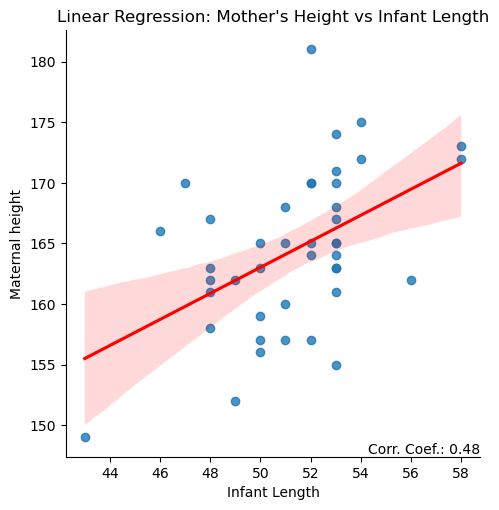

In [44]:
# Create a linear regression plot with red line
sns.lmplot(x='Length', y='mheight', data=df, line_kws={'color': 'red'})

# Calculate correlation coefficient
corr_coef = np.corrcoef(df['Length'], df['mheight'])[0, 1]

# Set plot title and labels
plt.title("Linear Regression: Mother's Height vs Infant Length")
plt.xlabel("Infant Length")
plt.ylabel("Maternal height")

# Add correlation coefficient to the plot
plt.text(plt.xlim()[1], plt.ylim()[0], f"Corr. Coef.: {corr_coef:.2f}", ha='right', va='bottom')

# Show the plot
plt.show()

In [36]:
from scipy.stats import pearsonr

# Select the variables of interest
height = df['mheight']
length = df['Length']

# Perform the significance test
correlation, p_value = pearsonr(height, length)

# Print the correlation coefficient and p-value
print(f"Correlation coefficient: {correlation:.3f}")
print(f"P-value: {p_value:.3f}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant linear relationship.")
else:
    print("Fail to reject the null hypothesis. There is no significant linear relationship.")

Correlation coefficient: 0.485
P-value: 0.001
Reject the null hypothesis. There is a significant linear relationship.


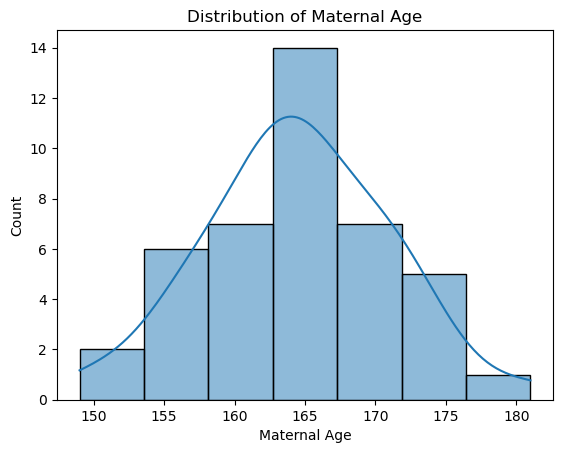

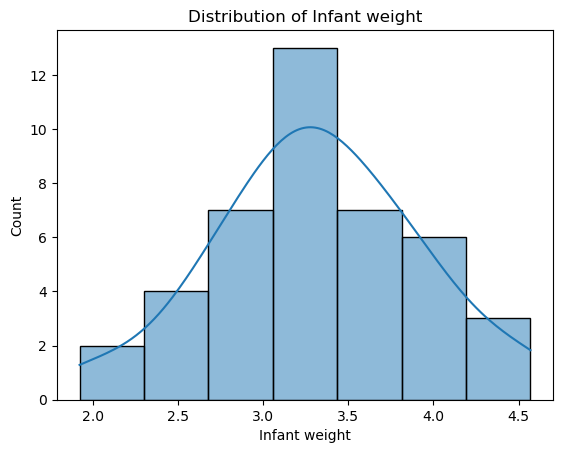

Variable: mheight
Shapiro-Wilk Test - Statistic: 0.9921, p-value: 0.9912
The variable is likely normally distributed.

Variable: Birthweight
Shapiro-Wilk Test - Statistic: 0.9899, p-value: 0.9685
The variable is likely normally distributed.

Skewness of mheight: 0.0163
Skewness of Birthweight: -0.0535


In [45]:
# Histogram visualization
sns.histplot(df['mheight'], kde=True)
plt.title('Distribution of Maternal Age')
plt.xlabel('Maternal Age')
plt.show()

sns.histplot(df['Birthweight'], kde=True)
plt.title('Distribution of Infant weight')
plt.xlabel('Infant weight')
plt.show()

# Shapiro-Wilk test
variables = ['mheight', 'Birthweight']

for variable in variables:
    stat, p_value = stats.shapiro(df[variable])
    is_normal = p_value > 0.05
    print(f"Variable: {variable}")
    print(f"Shapiro-Wilk Test - Statistic: {stat:.4f}, p-value: {p_value:.4f}")
    if is_normal:
        print("The variable is likely normally distributed.")
    else:
        print("The variable is not likely normally distributed.")
    print()

# Select the variables of interest
variables = ['mheight', 'Birthweight']

# Calculate skewness for each variable
for variable in variables:
    skewness = stats.skew(df[variable])
    print(f"Skewness of {variable}: {skewness:.4f}")


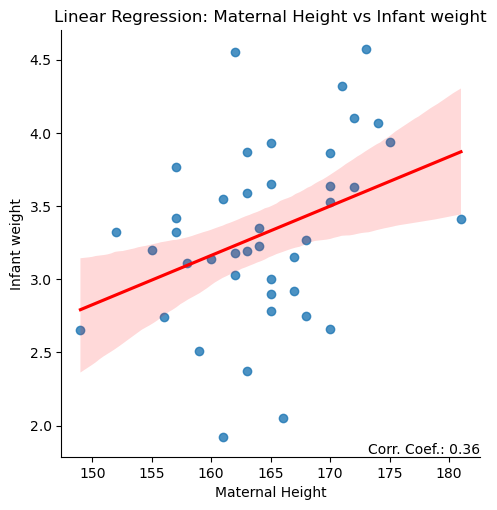

In [46]:
# Create a linear regression plot with red line
sns.lmplot(x='mheight', y='Birthweight', data=df, line_kws={'color': 'red'})

# Calculate correlation coefficient
corr_coef = np.corrcoef(df['mheight'], df['Birthweight'])[0, 1]

# Set plot title and labels
plt.title("Linear Regression: Maternal Height vs Infant weight")
plt.xlabel("Maternal Height")
plt.ylabel("Infant weight")

# Add correlation coefficient to the plot
plt.text(plt.xlim()[1], plt.ylim()[0], f"Corr. Coef.: {corr_coef:.2f}", ha='right', va='bottom')

# Show the plot
plt.show()

In [37]:
from scipy.stats import pearsonr

# Select the variables of interest
height = df['mheight']
length = df['Birthweight']

# Perform the significance test
correlation, p_value = pearsonr(height, length)

# Print the correlation coefficient and p-value
print(f"Correlation coefficient: {correlation:.3f}")
print(f"P-value: {p_value:.3f}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant linear relationship.")
else:
    print("Fail to reject the null hypothesis. There is no significant linear relationship.")

Correlation coefficient: 0.363
P-value: 0.018
Reject the null hypothesis. There is a significant linear relationship.


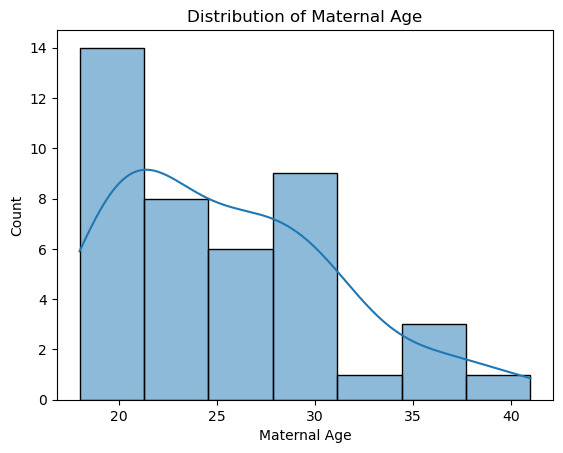

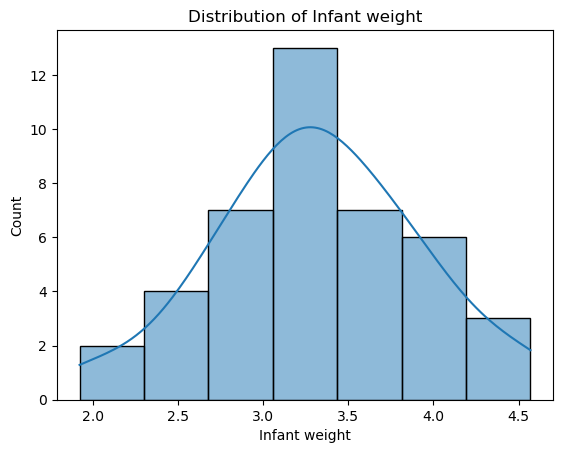

Variable: mage
Shapiro-Wilk Test - Statistic: 0.9233, p-value: 0.0078
The variable is not likely normally distributed.

Variable: Birthweight
Shapiro-Wilk Test - Statistic: 0.9899, p-value: 0.9685
The variable is likely normally distributed.

Skewness of mage: 0.7744
Skewness of Birthweight: -0.0535


In [47]:
# Histogram visualization
sns.histplot(df['mage'], kde=True)
plt.title('Distribution of Maternal Age')
plt.xlabel('Maternal Age')
plt.show()

sns.histplot(df['Birthweight'], kde=True)
plt.title('Distribution of Infant weight')
plt.xlabel('Infant weight')
plt.show()

# Shapiro-Wilk test
variables = ['mage', 'Birthweight']

for variable in variables:
    stat, p_value = stats.shapiro(df[variable])
    is_normal = p_value > 0.05
    print(f"Variable: {variable}")
    print(f"Shapiro-Wilk Test - Statistic: {stat:.4f}, p-value: {p_value:.4f}")
    if is_normal:
        print("The variable is likely normally distributed.")
    else:
        print("The variable is not likely normally distributed.")
    print()

# Select the variables of interest
variables = ['mage', 'Birthweight']

# Calculate skewness for each variable
for variable in variables:
    skewness = stats.skew(df[variable])
    print(f"Skewness of {variable}: {skewness:.4f}")


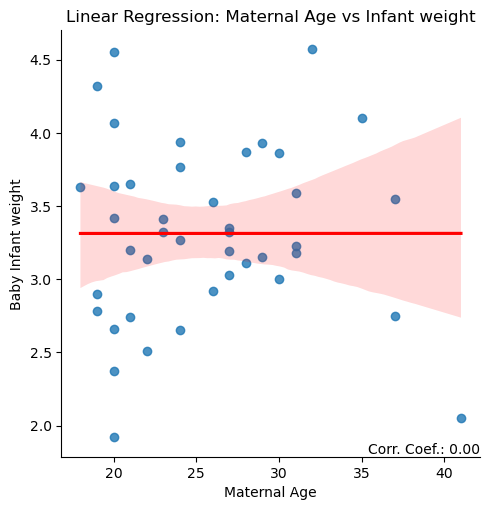

In [49]:
# Create a linear regression plot with red line
sns.lmplot(x='mage', y='Birthweight', data=df, line_kws={'color': 'red'})

# Calculate correlation coefficient
corr_coef = np.corrcoef(df['mage'], df['Birthweight'])[0, 1]

# Set plot title and labels
plt.title("Linear Regression: Maternal Age vs Infant weight")
plt.xlabel("Maternal Age")
plt.ylabel("Baby Infant weight")

# Add correlation coefficient to the plot
plt.text(plt.xlim()[1], plt.ylim()[0], f"Corr. Coef.: {corr_coef:.2f}", ha='right', va='bottom')

# Show the plot
plt.show()

In [41]:
from scipy.stats import pearsonr

# Select the variables of interest
height = df['mage']
length = df['Birthweight']

# Perform the significance test
correlation, p_value = pearsonr(height, length)

# Print the correlation coefficient and p-value
print(f"Correlation coefficient: {correlation:.3f}")
print(f"P-value: {p_value:.3f}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant linear relationship.")
else:
    print("Fail to reject the null hypothesis. There is no significant linear relationship.")

Correlation coefficient: 0.000
P-value: 0.999
Fail to reject the null hypothesis. There is no significant linear relationship.


#### Key findings and Insight

1. Relationship between Mother's Height and Baby Length:
    - The variable "mheight" follows a normal distribution (Shapiro-Wilk test, p-value > 0.05).
    - The variable "Length" also exhibits a normal distribution (Shapiro-Wilk test, p-value > 0.05).
    - There is a significant positive linear relationship between mother's height and baby length (correlation coefficient = 0.485, p-value = 0.001).
    
    
2. Relationship between Mother's Height and Baby Birthweight:
    - The variable "mheight" is normally distributed (Shapiro-Wilk test, p-value > 0.05).
    - The variable "Birthweight" also follows a normal distribution (Shapiro-Wilk test, p-value > 0.05).
    - There is a significant positive linear relationship between mother's height and baby birthweight (correlation coefficient = 0.363, p-value = 0.018).
    
    
3. Relationship between Mother's Age and Baby Length:
    - The variable "mage" does not follow a normal distribution (Shapiro-Wilk test, p-value < 0.05).
    - The variable "Birthweight" is normally distributed (Shapiro-Wilk test, p-value > 0.05).
    - There is no significant linear relationship between mother's age and baby length (correlation coefficient = 0.000, p-value = 0.999).

#### Conclusion
Based on the EDA findings, the analysis reveals significant associations between certain variables. Mother's height shows positive linear relationships with both baby length and birthweight, indicating that taller mothers tend to have longer and heavier babies. However, there is no significant relationship between mother's age and baby length. These findings suggest that maternal height can be a potential factor influencing infant characteristics.

#### Next steps:
- Outlier Analysis: Conduct a thorough analysis of outliers in the dataset for each variable of interest. Identify any extreme or unusual observations that may affect the analysis and consider appropriate actions such as data cleaning or transformation.
- Further Statistical Analysis: Perform additional statistical tests or regression models to explore the relationships between other variables in the dataset. For example, investigate the relationship between mother's age and baby birthweight or explore interactions between multiple variables.